In [62]:
#import dependencies
import json
import requests
import pandas as pd
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [63]:
# # backup data sources.  I ran into an issue where the data was not available via the API because the website was down. 
# bach = os.path.join("bach.csv")
# workexp = os.path.join("workexp.csv")
# bachdf = pd.read_csv(bach)
# workdf = pd.read_csv(workexp)

In [64]:
#import API key
api_key

'84e4798844734bdb95e6143366988f24'

In [65]:
#input the various components of the API call in to variables so that they can be used in my for loop
base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
startyear = '2018'
endyear = '2018'

In [66]:
#These occupation codes correlate to the jobs we are investigation. The codes come from here:https://download.bls.gov/pub/time.series/or/or.occupation
occupationcode = ["092", "091", "057", "087", "080", "127", "130", "125", "123", "126", "184", "166", "168", "169", "162"]

#put the data i find into a list
bachelors_data = []

#for loop for each occupation code.  Print out the call, then also append the results to my list of dicts
for i in range(len(occupationcode)):
    print(f"Making request for Code: {occupationcode[i]}")
    post_response = requests.get(base_url + 'ORUV10000' + occupationcode[i] + '00001029?registrationkey='+
                                 api_key + '&catalog=true&startyear=' +startyear + '&endyear=' + endyear +
                                 '&calculations=false&annualaverage=false').json()
    
    bachelors_data.append({
        "Occupation":post_response["Results"]["series"][0]["catalog"]["occupation"],
        "% Percent with bachelor's degree": post_response["Results"]["series"][0]["data"][0]["value"]
        })

bachelors_data



Making request for Code: 092
Making request for Code: 091
Making request for Code: 057
Making request for Code: 087
Making request for Code: 080
Making request for Code: 127
Making request for Code: 130
Making request for Code: 125
Making request for Code: 123
Making request for Code: 126
Making request for Code: 184
Making request for Code: 166
Making request for Code: 168
Making request for Code: 169
Making request for Code: 162


[{'Occupation': 'Market Research Analysts and Marketing Specialists',
  "% Percent with bachelor's degree": '84.8'},
 {'Occupation': 'Training and Development Specialists',
  "% Percent with bachelor's degree": '70.8'},
 {'Occupation': 'Compliance Managers',
  "% Percent with bachelor's degree": '57.7'},
 {'Occupation': 'Management Analysts',
  "% Percent with bachelor's degree": '87.5'},
 {'Occupation': 'Cost Estimators', "% Percent with bachelor's degree": '37.0'},
 {'Occupation': 'Software Developers, Applications',
  "% Percent with bachelor's degree": '88.6'},
 {'Occupation': 'Database Administrators',
  "% Percent with bachelor's degree": '89.1'},
 {'Occupation': 'Information Security Analysts',
  "% Percent with bachelor's degree": '85.7'},
 {'Occupation': 'Computer Systems Analysts',
  "% Percent with bachelor's degree": '80.1'},
 {'Occupation': 'Computer Programmers',
  "% Percent with bachelor's degree": '84.2'},
 {'Occupation': 'Mechanical Engineers',
  "% Percent with bache

In [67]:
#These occupation codes correlate to the jobs we are investigation. The codes come from here:https://download.bls.gov/pub/time.series/or/or.occupation
occupationcode = ["092", "091", "057", "087", "080", "127", "130", "125", "123", "126", "184", "166", "168", "169", "162"]

#put the data i find into a list
workexp_data = []

#for loop for each occupation code.  Print out the call, then also append the results to my list of dicts
for i in range(len(occupationcode)):
    print(f"Making request for Code: {occupationcode[i]}")
    post_response = requests.get(base_url + 'ORUV10000' + occupationcode[i] + '00000108?registrationkey='+
                                 api_key + '&catalog=true&startyear=' +startyear + '&endyear=' + endyear +
                                 '&calculations=false&annualaverage=false').json()
    
    


    workexp_data.append({
        "Occupation":post_response["Results"]["series"][0]["catalog"]["occupation"],
        "Days of prior work experience, mean": post_response["Results"]["series"][0]["data"][0]["value"]
        })

workexp_data

Making request for Code: 092
Making request for Code: 091
Making request for Code: 057
Making request for Code: 087
Making request for Code: 080
Making request for Code: 127
Making request for Code: 130
Making request for Code: 125
Making request for Code: 123
Making request for Code: 126
Making request for Code: 184
Making request for Code: 166
Making request for Code: 168
Making request for Code: 169
Making request for Code: 162


[{'Occupation': 'Market Research Analysts and Marketing Specialists',
  'Days of prior work experience, mean': '1237.44'},
 {'Occupation': 'Training and Development Specialists',
  'Days of prior work experience, mean': '1298.85'},
 {'Occupation': 'Compliance Managers',
  'Days of prior work experience, mean': '2255.05'},
 {'Occupation': 'Management Analysts',
  'Days of prior work experience, mean': '1677.20'},
 {'Occupation': 'Cost Estimators',
  'Days of prior work experience, mean': '1559.15'},
 {'Occupation': 'Software Developers, Applications',
  'Days of prior work experience, mean': '1756.60'},
 {'Occupation': 'Database Administrators',
  'Days of prior work experience, mean': '1396.52'},
 {'Occupation': 'Information Security Analysts',
  'Days of prior work experience, mean': '1212.28'},
 {'Occupation': 'Computer Systems Analysts',
  'Days of prior work experience, mean': '1720.13'},
 {'Occupation': 'Computer Programmers',
  'Days of prior work experience, mean': '979.54'},
 {

In [68]:
#convert my dictionaries to a dataframe
bachelors_df = pd.DataFrame(bachelors_data)
bachelors_df

,Occupation,% Percent with bachelor's degree
0,Market Research Analysts and Marketing Special...,84.8
1,Training and Development Specialists,70.8
2,Compliance Managers,57.7
3,Management Analysts,87.5
4,Cost Estimators,37.0
5,"Software Developers, Applications",88.6
6,Database Administrators,89.1
7,Information Security Analysts,85.7
8,Computer Systems Analysts,80.1
9,Computer Programmers,84.2


In [69]:
#Check the data type
bachelors_df.dtypes

Occupation                          object
% Percent with bachelor's degree    object
dtype: object

In [70]:
#convert the data type to numeric for charts
bachelors_df[["% Percent with bachelor's degree"]] = bachelors_df[["% Percent with bachelor's degree"]].apply(pd.to_numeric)

In [71]:
#check again
bachelors_df.dtypes

Occupation                           object
% Percent with bachelor's degree    float64
dtype: object

In [72]:
#convert my dicts into a dataframe
workexp_df = pd.DataFrame(workexp_data)
workexp_df

,Occupation,"Days of prior work experience, mean"
0,Market Research Analysts and Marketing Special...,1237.44
1,Training and Development Specialists,1298.85
2,Compliance Managers,2255.05
3,Management Analysts,1677.20
4,Cost Estimators,1559.15
5,"Software Developers, Applications",1756.60
6,Database Administrators,1396.52
7,Information Security Analysts,1212.28
8,Computer Systems Analysts,1720.13
9,Computer Programmers,979.54


In [73]:
#convert the days value I obtained to years, for charting purposes
workexp_df["Years of Prior work experience"] = (workexp_df["Days of prior work experience, mean"]).astype(float)/365

In [74]:
workexp_df

,Occupation,"Days of prior work experience, mean",Years of Prior work experience
0,Market Research Analysts and Marketing Special...,1237.44,3.390247
1,Training and Development Specialists,1298.85,3.558493
2,Compliance Managers,2255.05,6.178219
3,Management Analysts,1677.20,4.595068
4,Cost Estimators,1559.15,4.271644
5,"Software Developers, Applications",1756.60,4.812603
6,Database Administrators,1396.52,3.826082
7,Information Security Analysts,1212.28,3.321315
8,Computer Systems Analysts,1720.13,4.712685
9,Computer Programmers,979.54,2.683671


In [75]:
#check data types
workexp_df.dtypes

Occupation                              object
Days of prior work experience, mean     object
Years of Prior work experience         float64
dtype: object

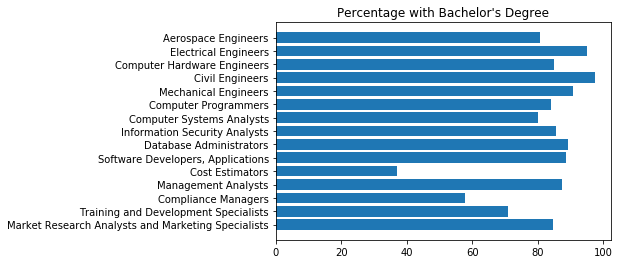

In [76]:
#put all values into a variable just to see how all the data looks
bachvals = bachelors_df["% Percent with bachelor's degree"].astype(float)
occ = bachelors_df["Occupation"]

fig, ax = plt.subplots()
ax.barh (occ, width = bachvals);
ax.set_title("Percentage with Bachelor's Degree");

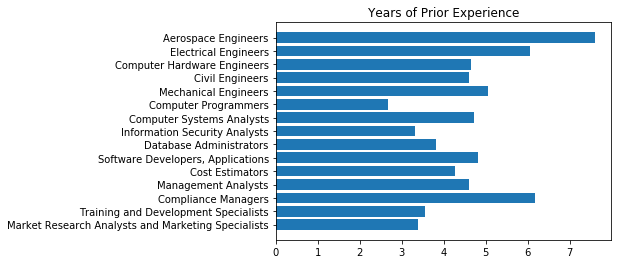

In [77]:
#put all values into a variable just to see how all the data looks
work = workexp_df["Years of Prior work experience"]
occ = workexp_df["Occupation"]

fig, ax = plt.subplots()
ax.barh(occ, width = work);
ax.set_title("Years of Prior Experience");


In [153]:
#split up the dataframe into the groups: business operations, bachelors degree
bachdfbus = bachelors_df.iloc[0:5]

In [154]:
bachdfbus

,Occupation,% Percent with bachelor's degree
0,Market Research Analysts and Marketing Special...,84.8
1,Training and Development Specialists,70.8
2,Compliance Managers,57.7
3,Management Analysts,87.5
4,Cost Estimators,37.0


In [156]:
#split up the dataframe into the groups: computer occupations, bachelors degree
bachdfcomp = bachelors_df.iloc[5:10]

In [157]:
bachdfcomp

,Occupation,% Percent with bachelor's degree
5,"Software Developers, Applications",88.6
6,Database Administrators,89.1
7,Information Security Analysts,85.7
8,Computer Systems Analysts,80.1
9,Computer Programmers,84.2


In [159]:
#split up the dataframe into the groups: engineering, bachelors degree
bachdfeng = bachelors_df.iloc[10:15]

In [160]:
bachdfeng

,Occupation,% Percent with bachelor's degree
10,Mechanical Engineers,90.7
11,Civil Engineers,97.4
12,Computer Hardware Engineers,85.1
13,Electrical Engineers,95.2
14,Aerospace Engineers,80.7


In [162]:
#split up the dataframe into the groups: business operations, work experience
workdfbus = workexp_df.iloc[0:5]

In [163]:
workdfbus

,Occupation,"Days of prior work experience, mean",Years of Prior work experience
0,Market Research Analysts and Marketing Special...,1237.44,3.390247
1,Training and Development Specialists,1298.85,3.558493
2,Compliance Managers,2255.05,6.178219
3,Management Analysts,1677.20,4.595068
4,Cost Estimators,1559.15,4.271644


In [164]:
#split up the dataframe into the groups: computer occupations, work experience
workdfcomp = workexp_df.iloc[5:10]

In [165]:
workdfcomp

,Occupation,"Days of prior work experience, mean",Years of Prior work experience
5,"Software Developers, Applications",1756.60,4.812603
6,Database Administrators,1396.52,3.826082
7,Information Security Analysts,1212.28,3.321315
8,Computer Systems Analysts,1720.13,4.712685
9,Computer Programmers,979.54,2.683671


In [166]:
#split up the dataframe into the groups: engineering, work experience
workdfeng = workexp_df.iloc[10:15]

In [167]:
workdfeng

,Occupation,"Days of prior work experience, mean",Years of Prior work experience
10,Mechanical Engineers,1842.20,5.047123
11,Civil Engineers,1683.19,4.611479
12,Computer Hardware Engineers,1695.60,4.645479
13,Electrical Engineers,2214.24,6.066411
14,Aerospace Engineers,2773.86,7.599616


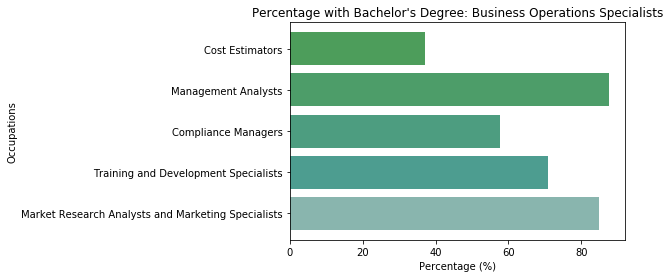

In [183]:
#put the datapoints in variables and chart
bachbusvals = bachdfbus["% Percent with bachelor's degree"]
occbus = bachdfbus["Occupation"]

fig, ax = plt.subplots()
ax.barh (occbus, width = bachbusvals, color = ["#89B5AE", "#4D9D90","#4D9D80","#4D9D69","#4D9D5B"] );
ax.set_title("Percentage with Bachelor's Degree: Business Operations Specialists");
ax.set_ylabel("Occupations");
ax.set_xlabel("Percentage (%)");
fig.savefig("bachbus.png", bbox_inches = 'tight')

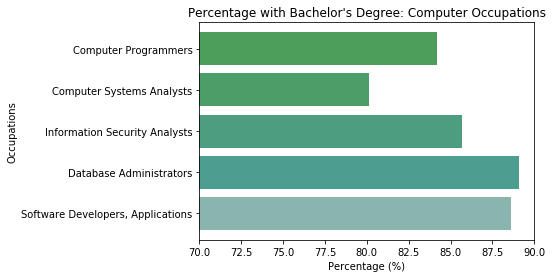

In [185]:
#put the datapoints in variables and chart
bachcompvals = bachdfcomp["% Percent with bachelor's degree"]
occcomp = bachdfcomp["Occupation"]

fig, ax = plt.subplots()
ax.barh (occcomp, width = bachcompvals, color = ["#89B5AE", "#4D9D90","#4D9D80","#4D9D69","#4D9D5B"]);
ax.set_title("Percentage with Bachelor's Degree: Computer Occupations");
ax.set_ylabel("Occupations");
ax.set_xlabel("Percentage (%)");
ax.set_xlim([70,90]);
fig.savefig("bachcomp.png", bbox_inches = 'tight')

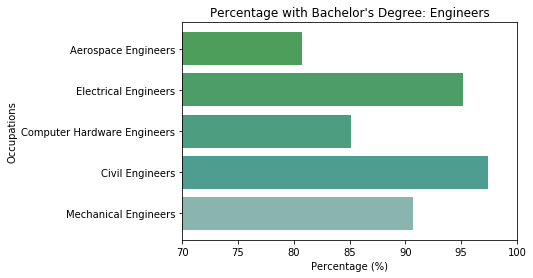

In [186]:
#put the datapoints in variables and chart
bachengvals = bachdfeng["% Percent with bachelor's degree"]
occeng = bachdfeng["Occupation"]

fig, ax = plt.subplots()
ax.barh (occeng, width = bachengvals, color = ["#89B5AE", "#4D9D90","#4D9D80","#4D9D69","#4D9D5B"]);
ax.set_title("Percentage with Bachelor's Degree: Engineers");
ax.set_ylabel("Occupations");
ax.set_xlabel("Percentage (%)");
ax.set_xlim([70,100]);
fig.savefig("bacheng.png", bbox_inches = 'tight')

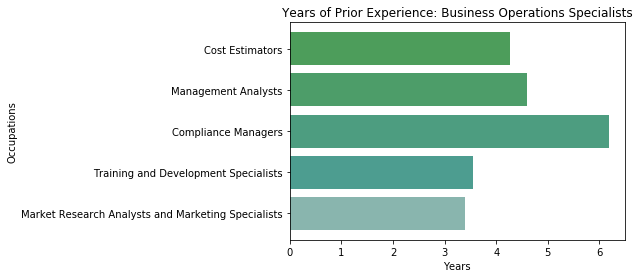

In [190]:
#put the datapoints in variables and chart
workbus = workdfbus["Years of Prior work experience"]
occwbus = workdfbus["Occupation"]

fig, ax = plt.subplots()
ax.barh(occwbus, width = workbus, color = ["#89B5AE", "#4D9D90","#4D9D80","#4D9D69","#4D9D5B"]);
ax.set_title("Years of Prior Experience: Business Operations Specialists");
ax.set_ylabel("Occupations");
ax.set_xlabel("Years");
fig.savefig("workbus.png", bbox_inches = 'tight')

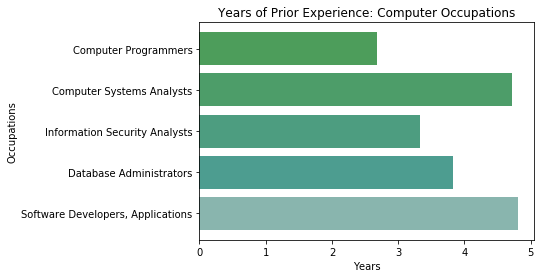

In [191]:
#put the datapoints in variables and chart
workcomp = workdfcomp["Years of Prior work experience"]
occwcomp = workdfcomp["Occupation"]

fig, ax = plt.subplots()
ax.barh(occwcomp, width = workcomp, color = ["#89B5AE", "#4D9D90","#4D9D80","#4D9D69","#4D9D5B"]);
ax.set_title("Years of Prior Experience: Computer Occupations");
ax.set_ylabel("Occupations");
ax.set_xlabel("Years");
fig.savefig("workcomp.png", bbox_inches = 'tight')

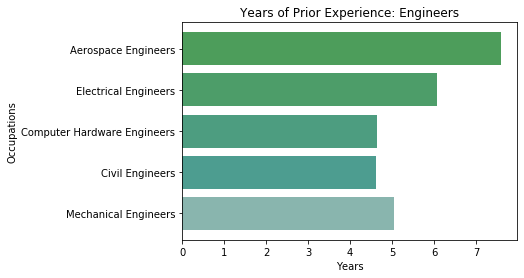

In [192]:
#put the datapoints in variables and chart
workeng = workdfeng["Years of Prior work experience"]
occweng = workdfeng["Occupation"]

fig, ax = plt.subplots()
ax.barh(occweng, width = workeng, color = ["#89B5AE", "#4D9D90","#4D9D80","#4D9D69","#4D9D5B"]);
ax.set_title("Years of Prior Experience: Engineers");
ax.set_ylabel("Occupations");
ax.set_xlabel("Years");
fig.savefig("workeng.png", bbox_inches = 'tight')